In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy as sp
import pandas as pd
from pandas.io.json import json_normalize
import json
import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [3]:
def convert_datetime(name):
    json = pd.read_json('data/downloads/' + name + '_download.json')
    df_json = pd.DataFrame(json['downloads'])
    df = json_normalize(df_json['downloads'])
    df['day'] = pd.to_datetime(df['day'], infer_datetime_format=True)
    df.index = df['day']
    return df

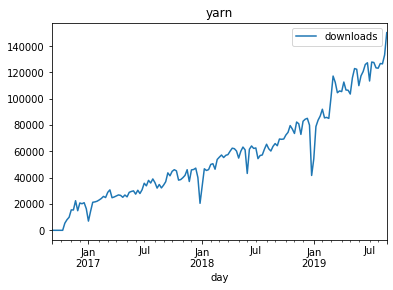

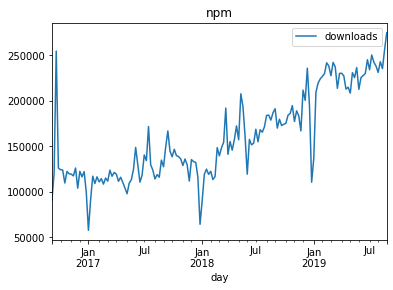

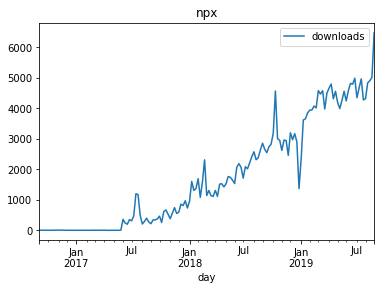

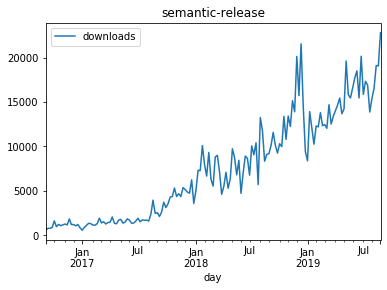

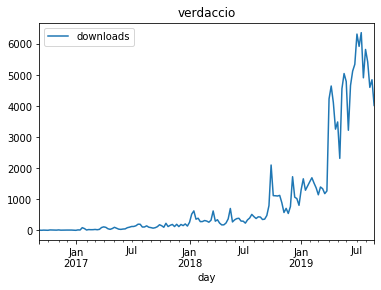

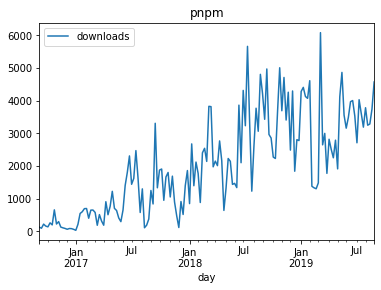

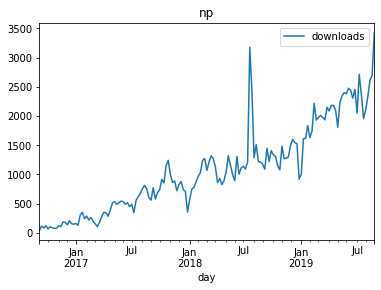

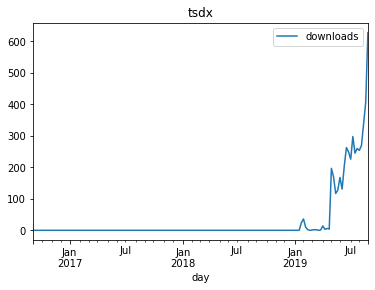

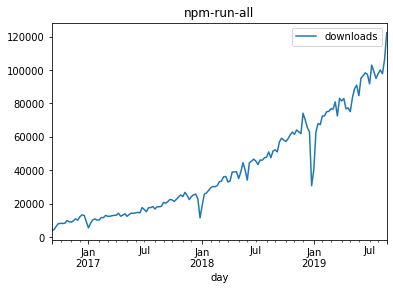

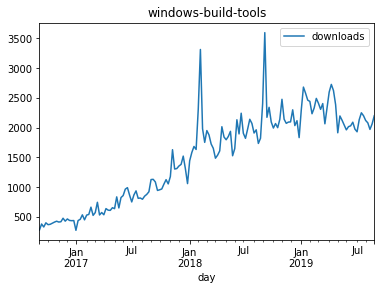

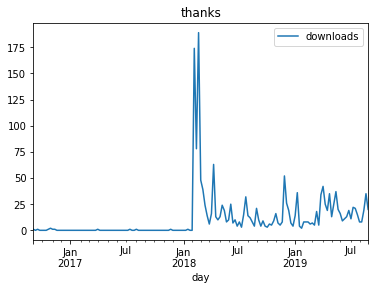

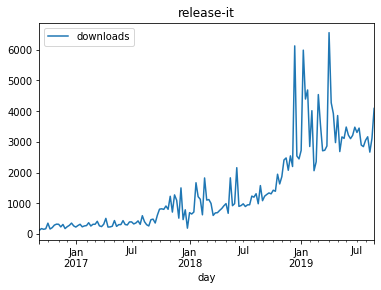

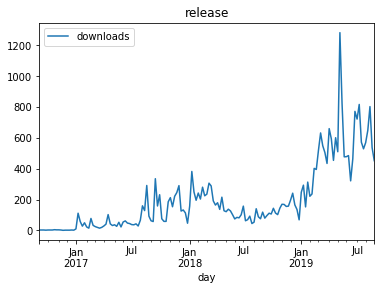

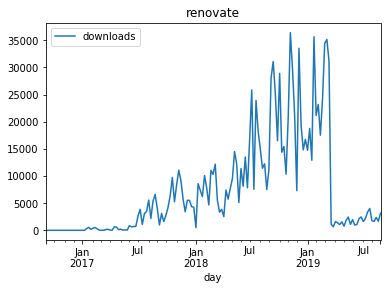

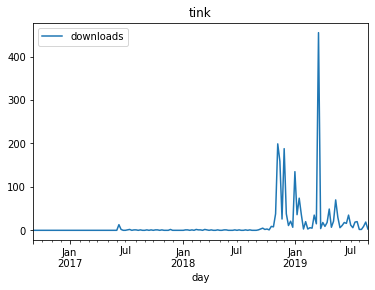

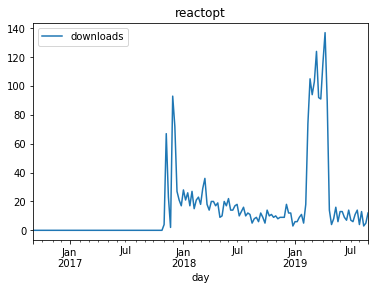

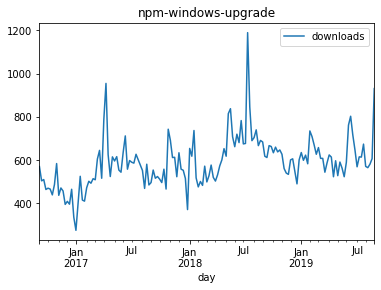

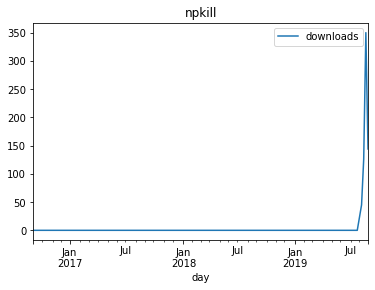

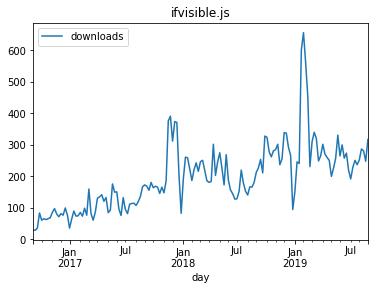

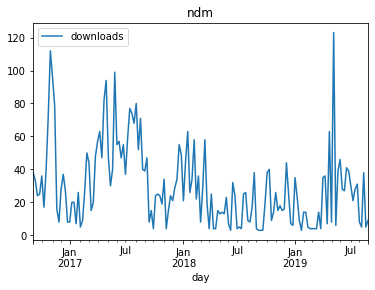

In [38]:
f = open("data/assets/npm_name.json")
data = json.load(f)
pkgs = data['npm_name']

df_array = []
npm_names = []
for pkg in pkgs:
    name = pkg["npmName"]
    df = convert_datetime(name)
    df = round(df.resample(rule="W").mean())
    df_array.append(df)
    npm_names.append(name)

df_array[0].plot(title=npm_names[0])
df_array[1].plot(title=npm_names[1])
df_array[2].plot(title=npm_names[2])
df_array[3].plot(title=npm_names[3])
df_array[4].plot(title=npm_names[4])
df_array[5].plot(title=npm_names[5])
df_array[6].plot(title=npm_names[6])
df_array[7].plot(title=npm_names[7])
df_array[8].plot(title=npm_names[8])
df_array[9].plot(title=npm_names[9])
df_array[10].plot(title=npm_names[10])
df_array[11].plot(title=npm_names[11])
df_array[12].plot(title=npm_names[12])
df_array[13].plot(title=npm_names[13])
df_array[14].plot(title=npm_names[14])
df_array[15].plot(title=npm_names[15])
df_array[16].plot(title=npm_names[16])
df_array[17].plot(title=npm_names[17])
df_array[18].plot(title=npm_names[18])
df_array[19].plot(title=npm_names[19])


In [55]:
name = 'serverless'
df = convert_datetime(name)
df = round(df.resample(rule="W").mean())
# df.plot(title=name)
s = df.loc['2019-09-01':, 'downloads']
d = s.values[0]
print(d)

AttributeError: 'numpy.float64' object has no attribute 'values'

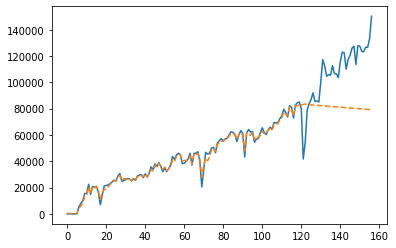

In [36]:
name = "yarn"
df = convert_datetime(name)
df = round(df.resample(rule="W").mean())
# df.plot(title=name)
# p_acf = sm.tsa.stattools.acf(df['downloads'])
# sm.graphics.tsa.plot_acf(df['downloads'], lags=40)
# sm.graphics.tsa.plot_pacf(df['downloads'], lags=35)
y = df['downloads']
y120 = y[:120]
model_d0 = ARIMA(y120, (3,0,2))
results_d0 = model_d0.fit()
res_d0 = results_d0.resid
# モデルの残差
# plt.bar(range(len(res_d0[1:])), res_d0[1:])

# モデルの偏自己相関
from statsmodels.graphics import tsaplots
# tsaplots.plot_pacf(res_d0[1:], lags=40)

# 予測モデルとの比較プロット
plt.plot(y.values, label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(3, 0, 2)による予測値を含めた系列の表示
# ARモデルの時とpredictの挙動が異なるので要注意
plt.plot(results_d0.predict(1, len(y)).values, 
         '--', label='forecast')



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:492: Hessi

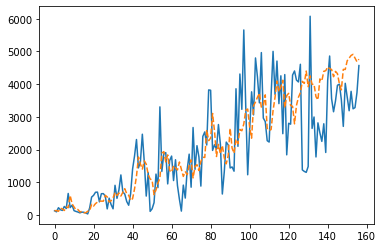

In [57]:
name = "pnpm"
df = convert_datetime(name)
df = round(df.resample(rule="W").mean())
# df.plot(title=name)
# p_acf = sm.tsa.stattools.acf(df['downloads'])
# sm.graphics.tsa.plot_acf(df['downloads'], lags=40)
# sm.graphics.tsa.plot_pacf(df['downloads'], lags=35)
y = df['downloads']
y120 = y[:120]
model_d0 = ARIMA(y120, (3,0,2))
results_d0 = model_d0.fit()
res_d0 = results_d0.resid
# モデルの残差
# plt.bar(range(len(res_d0[1:])), res_d0[1:])

# モデルの偏自己相関
from statsmodels.graphics import tsaplots
# tsaplots.plot_pacf(res_d0[1:], lags=40)

# 予測モデルとの比較プロット
# plt.plot(y.values, label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(3, 0, 2)による予測値を含めた系列の表示
# ARモデルの時とpredictの挙動が異なるので要注意
# plt.plot(results_d0.predict(1, len(y)).values, 
#          '--', label='forecast')


# SARIMAX モデル
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
seasonal = 12
result = SARIMAX(
    y120, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,seasonal), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()

# res = result.resid
# # 残差の出力
# plt.bar(range(len(res)), res)

plt.plot(y.values, label="observation")
plt.plot(np.hstack([y120[0], 
                    result.fittedvalues[1:], 
                    result.forecast(37)]), 
         '--', label="forecast")


In [49]:
name = "renovate"
df = convert_datetime(name)
df = round(df.resample(rule="W").mean())
# df.plot(title=name)
# p_acf = sm.tsa.stattools.acf(df['downloads'])
# sm.graphics.tsa.plot_acf(df['downloads'], lags=40)
# sm.graphics.tsa.plot_pacf(df['downloads'], lags=35)
y = df.index
print(y)

DatetimeIndex(['2016-09-04', '2016-09-11', '2016-09-18', '2016-09-25',
               '2016-10-02', '2016-10-09', '2016-10-16', '2016-10-23',
               '2016-10-30', '2016-11-06',
               ...
               '2019-06-30', '2019-07-07', '2019-07-14', '2019-07-21',
               '2019-07-28', '2019-08-04', '2019-08-11', '2019-08-18',
               '2019-08-25', '2019-09-01'],
              dtype='datetime64[ns]', name='day', length=157, freq='W-SUN')


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
